In [1]:
import pandas as pd
import numpy as np

import math

from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler, minmax_scale

### Absenteeism dataset

In [10]:
df = pd.read_csv('Datasets/absenteeism_processed.csv')

In [11]:
df.head()

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
0,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,4.0
1,118.0,13.0,18.0,50.0,239.554,98.0,178.0,31.0,0.0
2,179.0,51.0,18.0,38.0,239.554,89.0,170.0,31.0,2.0
3,279.0,5.0,14.0,39.0,239.554,68.0,168.0,24.0,4.0
4,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,2.0


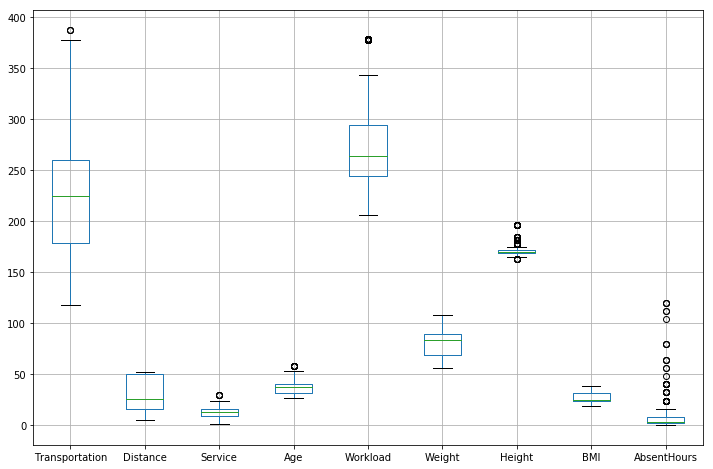

In [12]:
df.boxplot(figsize=(12, 8))

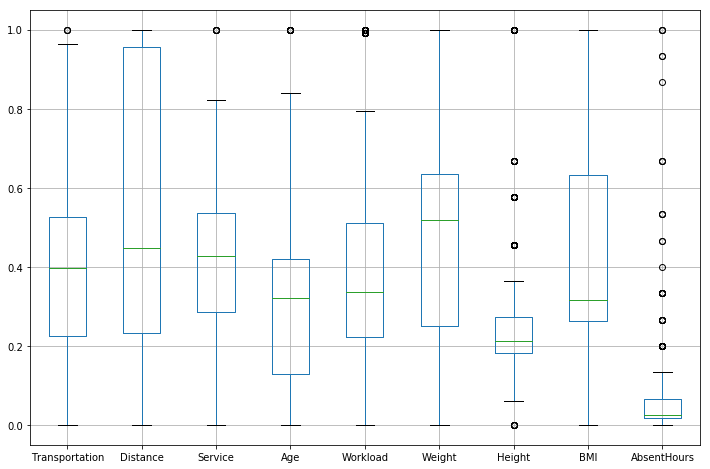

In [19]:
scaled_df = pd.DataFrame(minmax_scale(df), columns=df.columns)

scaled_df.boxplot(figsize=(12, 8))

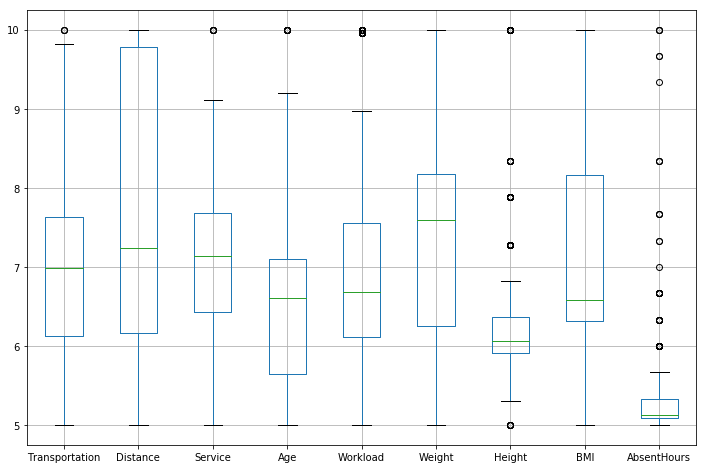

In [20]:
scaled_df = pd.DataFrame(minmax_scale(df, feature_range=(5, 10)), columns=df.columns)

scaled_df.boxplot(figsize=(12, 8))

In [28]:
height_df = pd.DataFrame(df['Height'], columns=['Height'])

height_df.head()

,Height
0,172.0
1,178.0
2,170.0
3,168.0
4,172.0


In [29]:
height_df['scaled'] = scale(height_df)

height_df.head()

,Height,scaled
0,172.0,-0.019046
1,178.0,0.975828
2,170.0,-0.350671
3,168.0,-0.682295
4,172.0,-0.019046


In [40]:
range_max = 100
range_min = 0

height_max = height_df['Height'].max()
height_min = height_df['Height'].min()

In [41]:
height_df['range_scaled'] = ((height_df['Height'] - height_min) / (height_max - height_min)) *  \
                            (range_max - range_min) +  \
                            range_min

height_df.head()

,Height,scaled,range_scaled,minmax_scaled
0,172.0,-0.019046,27.272727,27.272727
1,178.0,0.975828,45.454545,45.454545
2,170.0,-0.350671,21.212121,21.212121
3,168.0,-0.682295,15.151515,15.151515
4,172.0,-0.019046,27.272727,27.272727


In [42]:
height_df['minmax_scaled'] = minmax_scale(height_df['Height'], feature_range=(0, 100))

height_df.head()

,Height,scaled,range_scaled,minmax_scaled
0,172.0,-0.019046,27.272727,27.272727
1,178.0,0.975828,45.454545,45.454545
2,170.0,-0.350671,21.212121,21.212121
3,168.0,-0.682295,15.151515,15.151515
4,172.0,-0.019046,27.272727,27.272727


In [43]:
minmax_scaler = MinMaxScaler(feature_range=(0, 100))

In [47]:
height_df['minmax_estimator_scaled'] = \
    minmax_scaler.fit_transform(height_df['Height'].values.reshape(-1, 1))

height_df.head()

,Height,scaled,range_scaled,minmax_scaled,minmax_estimator_scaled
0,172.0,-0.019046,27.272727,27.272727,27.272727
1,178.0,0.975828,45.454545,45.454545,45.454545
2,170.0,-0.350671,21.212121,21.212121,21.212121
3,168.0,-0.682295,15.151515,15.151515,15.151515
4,172.0,-0.019046,27.272727,27.272727,27.272727
